In [8]:
import torch
import torch.nn.functional as F
from pyPDMP.models import VAE
from pyPDMP.utils import loss_function

import matplotlib.pyplot as plt
import torchvision
import torchvision.datasets as datasets

In [9]:
m = VAE()#.cuda()

In [10]:
m

VAE(
  (fc1): Linear(in_features=784, out_features=400, bias=True)
  (fc21): Linear(in_features=400, out_features=20, bias=True)
  (fc22): Linear(in_features=400, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=400, bias=True)
  (fc4): Linear(in_features=400, out_features=784, bias=True)
)

## Training the VAE

In [4]:
transform = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor()
    ])

dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

100.1%

Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz


113.5%

Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz


100.4%

Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz


180.4%

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [11]:
data_loader = torch.utils.data.DataLoader(dataset=dataset,
                                          batch_size=32, 
                                          shuffle=True)

In [12]:
size = 28*28

def train(m, loader, epochs):
    for epoch in range(epochs):
        optimizer = torch.optim.Adam(m.parameters(), lr=1e-3)
        m.train()
        train_loss = 0
        for batch_idx, (x, _) in enumerate(loader):
            # flatten the batch
            x = x.view(-1, size)
            optimizer.zero_grad()
            recon_batch, mu, logvar = m(x)
            loss = loss_function(recon_batch, x, mu, logvar)
            loss.backward()
            train_loss += loss.item()
            optimizer.step()
            if batch_idx % 100 == 0:
                print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    epoch, batch_idx * len(x), len(loader.dataset),
                    100. * batch_idx / len(loader),
                    loss.item() / len(x)))

        print('====> Epoch: {} Average loss: {:.4f}'.format(
              epoch, train_loss / len(loader.dataset)))

In [13]:
train(m, data_loader, 3)

Train Epoch: 0 [0/60000 (0%)]	Loss: 549.231567
Train Epoch: 0 [3200/60000 (5%)]	Loss: 197.502884
Train Epoch: 0 [6400/60000 (11%)]	Loss: 163.250885
Train Epoch: 0 [9600/60000 (16%)]	Loss: 149.264267
Train Epoch: 0 [12800/60000 (21%)]	Loss: 142.483322
Train Epoch: 0 [16000/60000 (27%)]	Loss: 136.046219
Train Epoch: 0 [19200/60000 (32%)]	Loss: 139.419388
Train Epoch: 0 [22400/60000 (37%)]	Loss: 129.697464
Train Epoch: 0 [25600/60000 (43%)]	Loss: 121.231865
Train Epoch: 0 [28800/60000 (48%)]	Loss: 132.707489
Train Epoch: 0 [32000/60000 (53%)]	Loss: 127.719315
Train Epoch: 0 [35200/60000 (59%)]	Loss: 132.242981
Train Epoch: 0 [38400/60000 (64%)]	Loss: 116.479111
Train Epoch: 0 [41600/60000 (69%)]	Loss: 120.558006
Train Epoch: 0 [44800/60000 (75%)]	Loss: 123.467606
Train Epoch: 0 [48000/60000 (80%)]	Loss: 112.293129
Train Epoch: 0 [51200/60000 (85%)]	Loss: 110.971230
Train Epoch: 0 [54400/60000 (91%)]	Loss: 118.246521
Train Epoch: 0 [57600/60000 (96%)]	Loss: 119.698563
====> Epoch: 0 Averag

In [14]:
x = data_loader.dataset.data[1]
y = m(x.float().view(-1,size))[0].view(28,28)

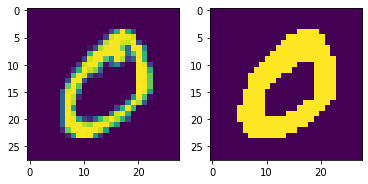

In [15]:
plt.figure()
plt.subplot(121)
plt.imshow(x)
plt.subplot(122)
plt.imshow(y.detach().numpy())

In [20]:
y = m(x.float().view(-1,size) + 10*torch.rand(1,size))[0].view(28,28)

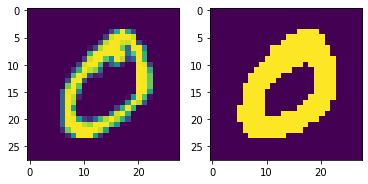

In [21]:
plt.figure()
plt.subplot(121)
plt.imshow(x)
plt.subplot(122)
plt.imshow(y.detach().numpy())

In [ ]:
%matplotlib tk
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

In [52]:
y = list()
for i in range(100):
    x = data_loader.dataset.data[1]
    y.append(m(x.float().view(-1,size) + 100*torch.rand(1,size))[0].view(28,28).detach())

In [53]:
y[0].shape

torch.Size([28, 28])

<IPython.core.display.Javascript object>


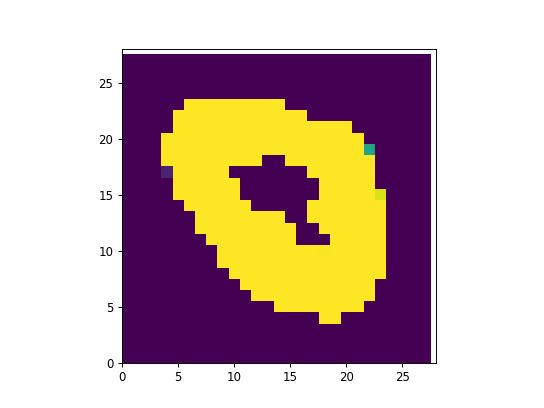

In [54]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 28), ylim=(0, 28))

im=plt.imshow(y[0])

# initialization function: plot the background of each frame
def init():
    im.set_data(y[0])
    return [im]

# animation function.  This is called sequentially
def animate(i):
    im.set_array(y[i])
    return [im]

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=100)

plt.show()